# YOLOv8 Small - PCB 결함 검사

## 1. 학습 환경

| 항목 | 설정 |
|------|------|
| 플랫폼 | Google Colab |
| GPU | Tesla T4 (14.7GB) |
| 모델 | YOLOv8s |
| 데이터 | PCB 결함 이미지 693장 |
| 학습/검증 | 552 / 141 |

## 2. 하이퍼파라미터

| 파라미터 | 값 |
|---------|-----|
| Epochs | 50 |
| Batch Size | 16 |
| Image Size | 416x416 |
| Optimizer | AdamW (lr=0.001) |
| Patience | 10 (Early Stopping) |

In [2]:
import os
import pandas as pd

RESULTS_PATH = './results/yolov8s_pcb'

# CSV 로드
results_csv = pd.read_csv(os.path.join(RESULTS_PATH, 'results.csv'))

# 최고 성능 epoch 찾기 (mAP50 기준)
best_idx = results_csv['metrics/mAP50(B)'].idxmax()
best_results = results_csv.iloc[best_idx]

# 최종 성능 지표
print("3. 학습 결과 \n")
print("\n최종 성능 지표:")
print("-" * 60)
print(f"  mAP50      : {best_results['metrics/mAP50(B)']:.3f} ({best_results['metrics/mAP50(B)']*100:.1f}%)")
print(f"  mAP50-95   : {best_results['metrics/mAP50-95(B)']:.3f} ({best_results['metrics/mAP50-95(B)']*100:.1f}%)")
print(f"  Precision  : {best_results['metrics/precision(B)']:.3f} ({best_results['metrics/precision(B)']*100:.1f}%)")
print(f"  Recall     : {best_results['metrics/recall(B)']:.3f} ({best_results['metrics/recall(B)']*100:.1f}%)")
print(f"  Best Epoch : {int(best_results['epoch'])}")


# 클래스별 성능 (Validation 로그 기준)
print("\n클래스별 성능:")
print("-" * 60)
class_results = {
    'Class': ['Missing_hole', 'Mouse_bite', 'Open_circuit', 'Short', 'Spur', 'Spurious_copper'],
    'Precision': [0.971, 0.914, 0.948, 0.907, 0.918, 0.862],
    'Recall': [1.000, 0.749, 0.592, 0.935, 0.686, 0.712],
    'mAP50': [0.986, 0.813, 0.810, 0.939, 0.806, 0.802]
}
df_class = pd.DataFrame(class_results)
print(df_class.to_string(index=False))

3. 학습 결과 


최종 성능 지표:
------------------------------------------------------------
  mAP50      : 0.859 (85.9%)
  mAP50-95   : 0.406 (40.6%)
  Precision  : 0.919 (91.9%)
  Recall     : 0.780 (78.0%)
  Best Epoch : 49

클래스별 성능:
------------------------------------------------------------
          Class  Precision  Recall  mAP50
   Missing_hole      0.971   1.000  0.986
     Mouse_bite      0.914   0.749  0.813
   Open_circuit      0.948   0.592  0.810
          Short      0.907   0.935  0.939
           Spur      0.918   0.686  0.806
Spurious_copper      0.862   0.712  0.802



학습 곡선:


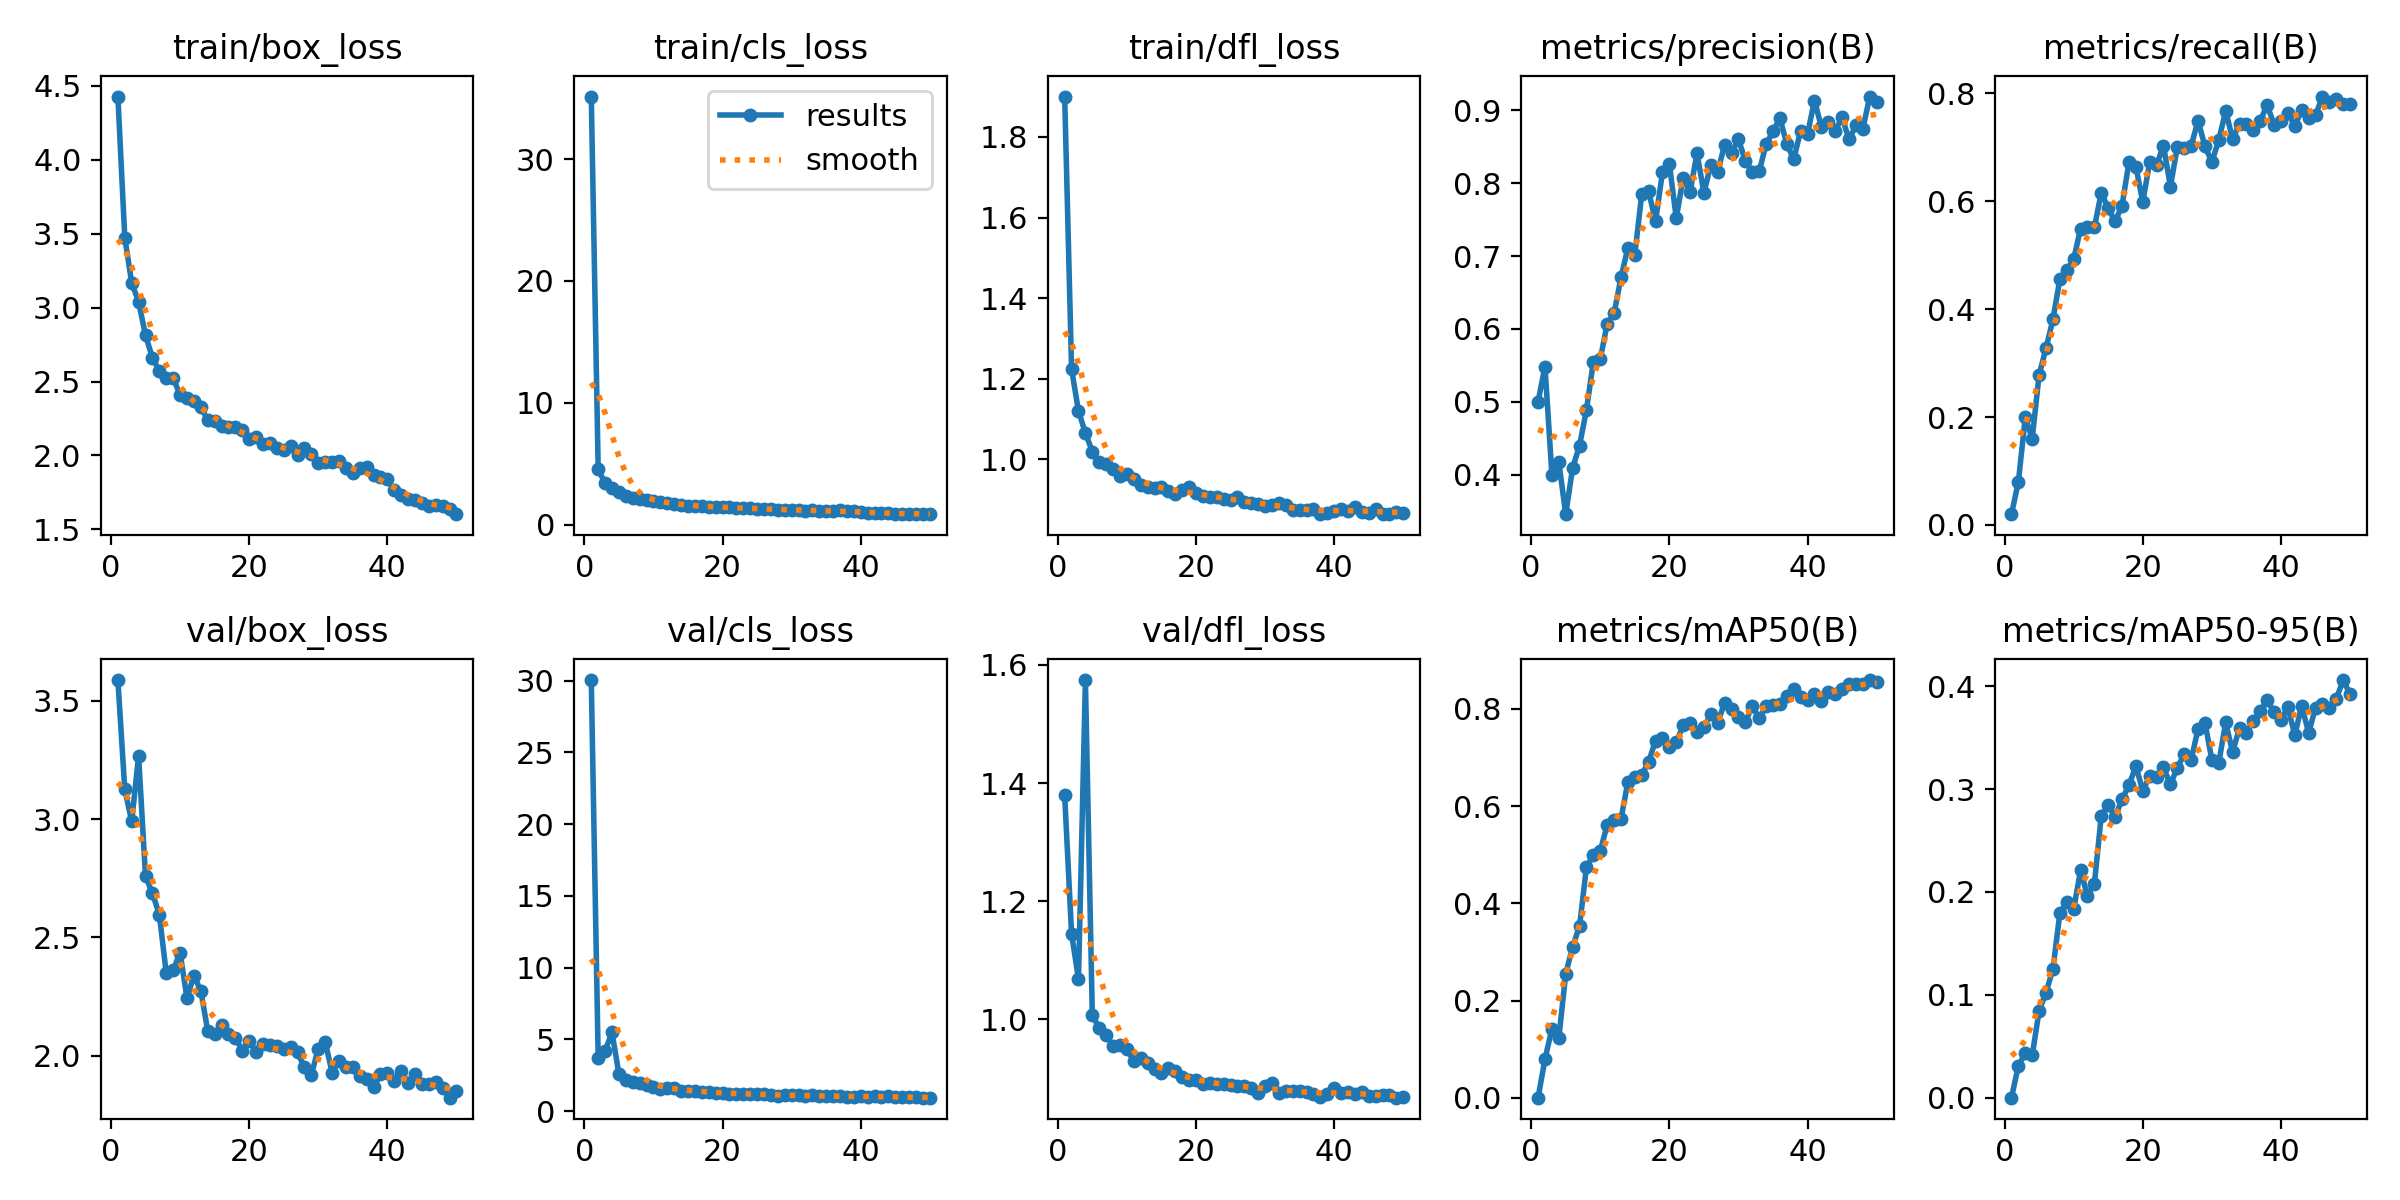


Confusion Matrix:


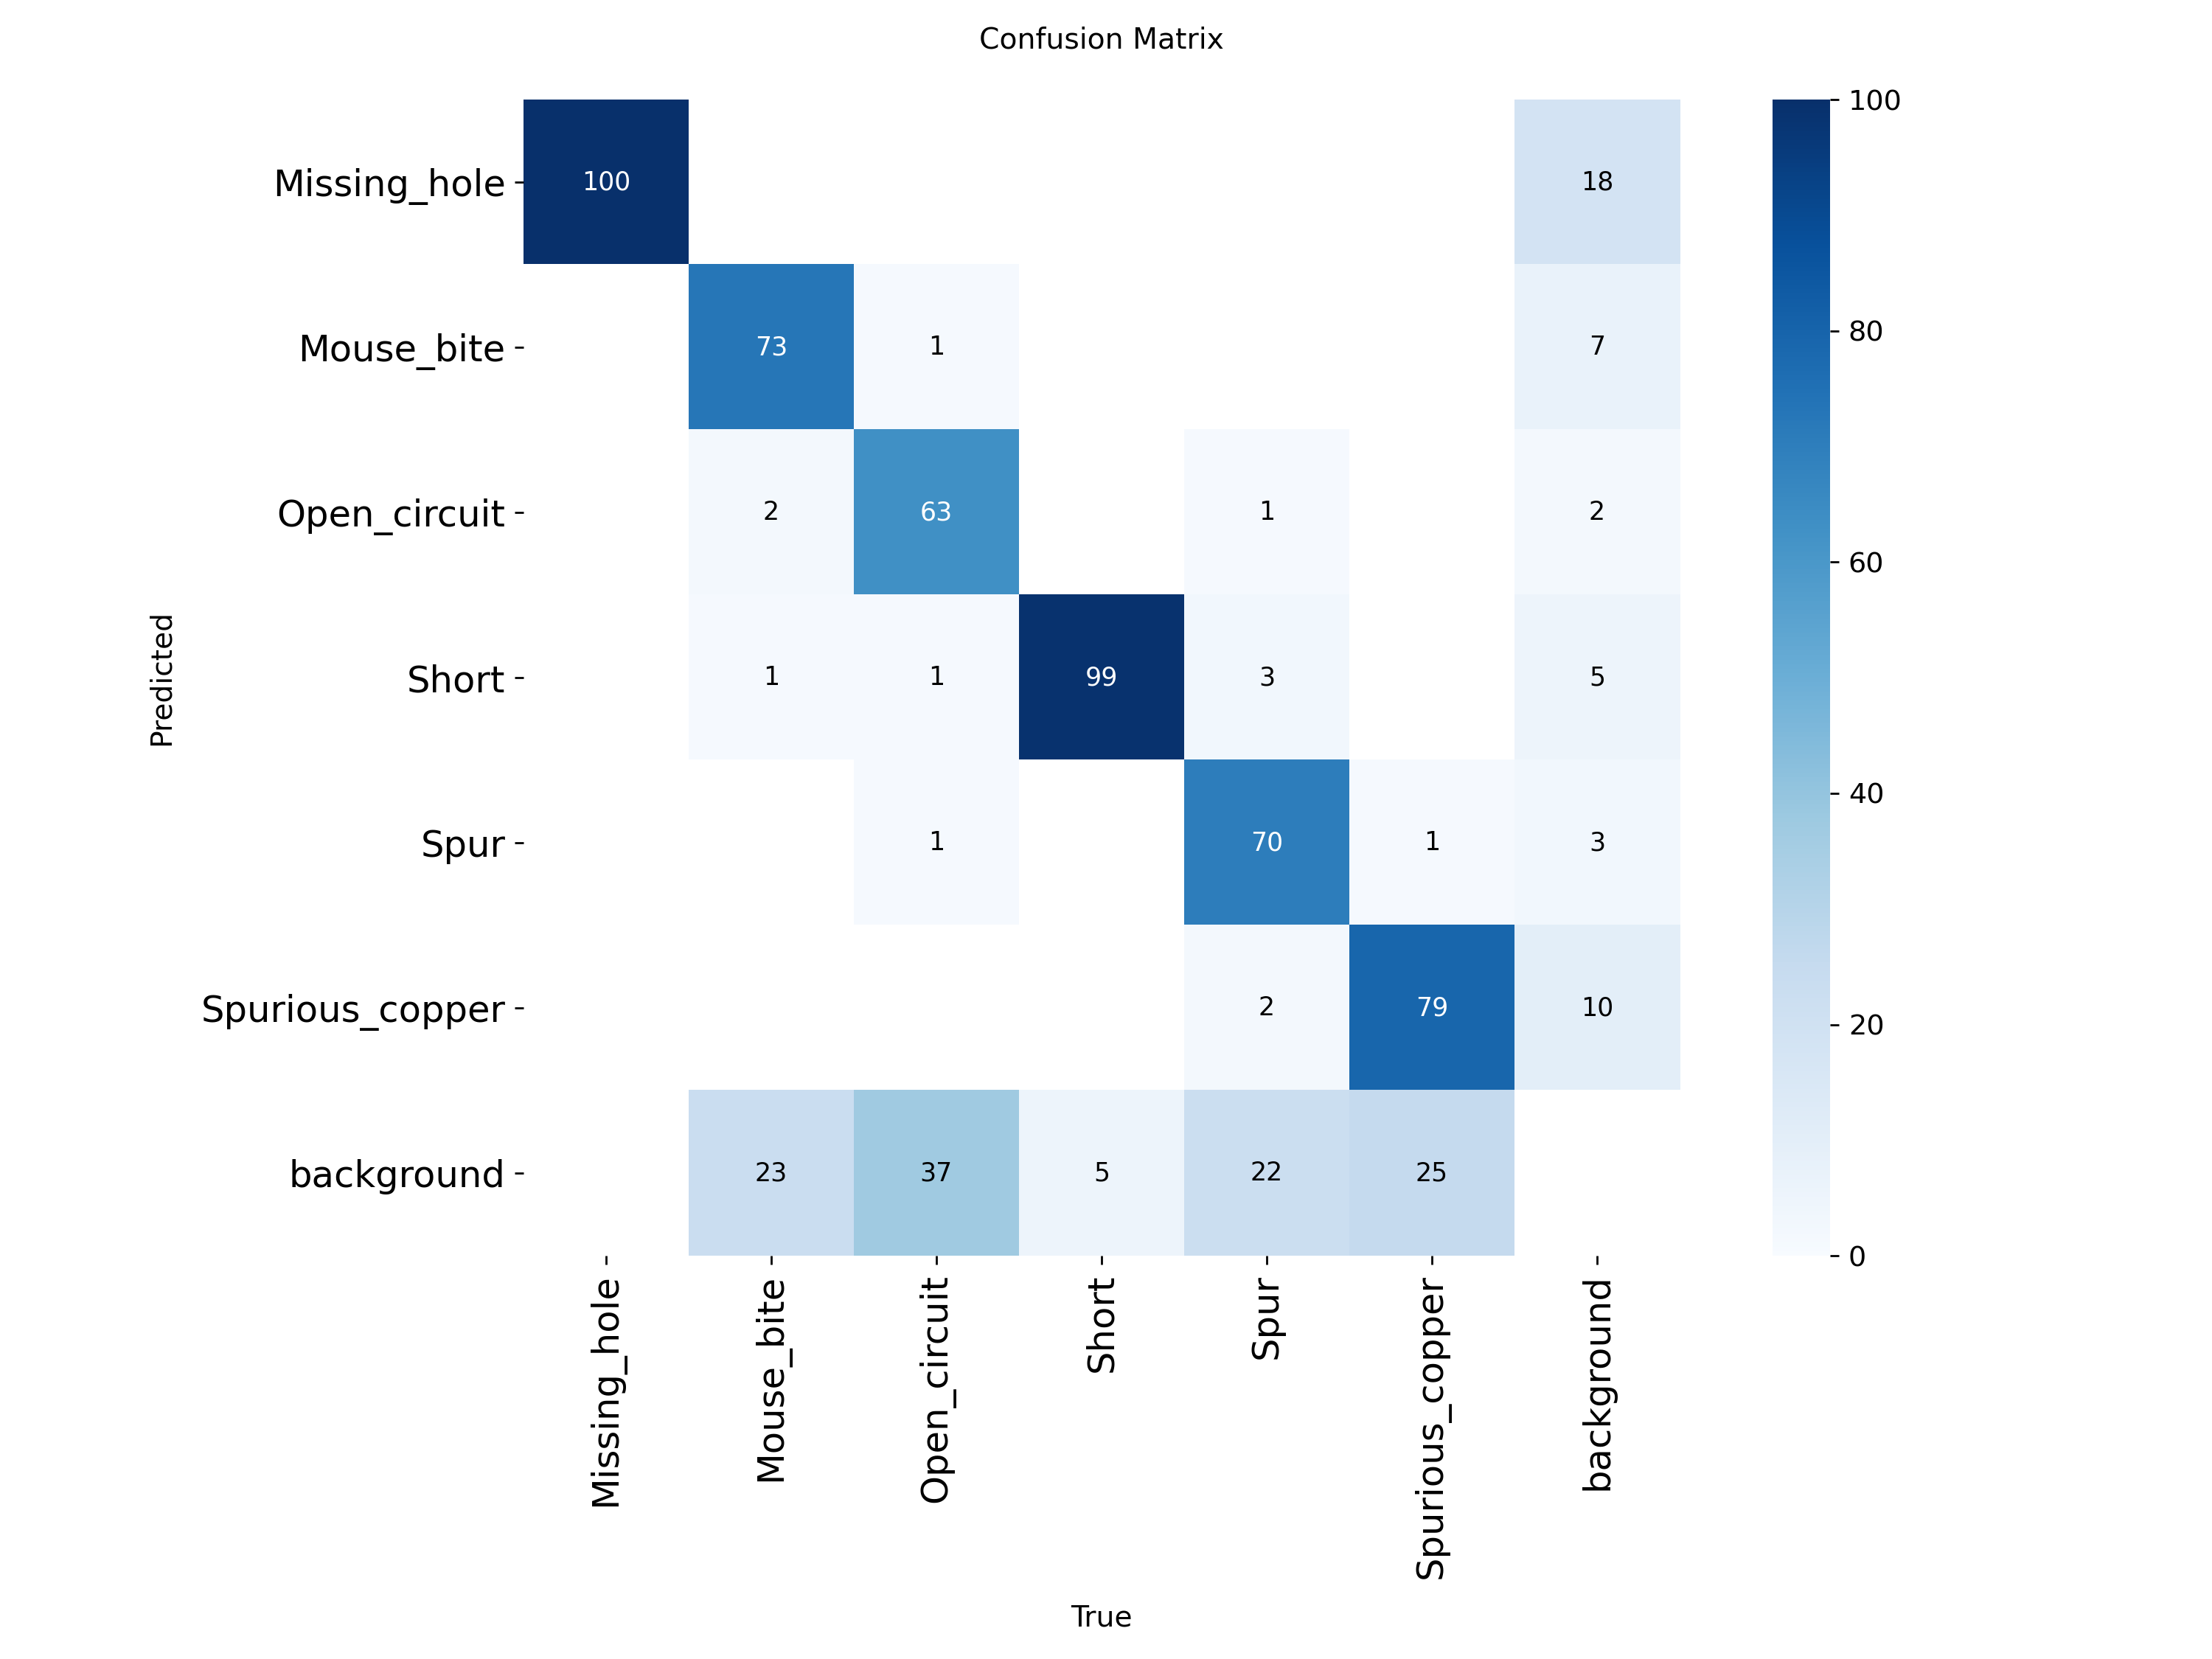


Precision-Recall 곡선:


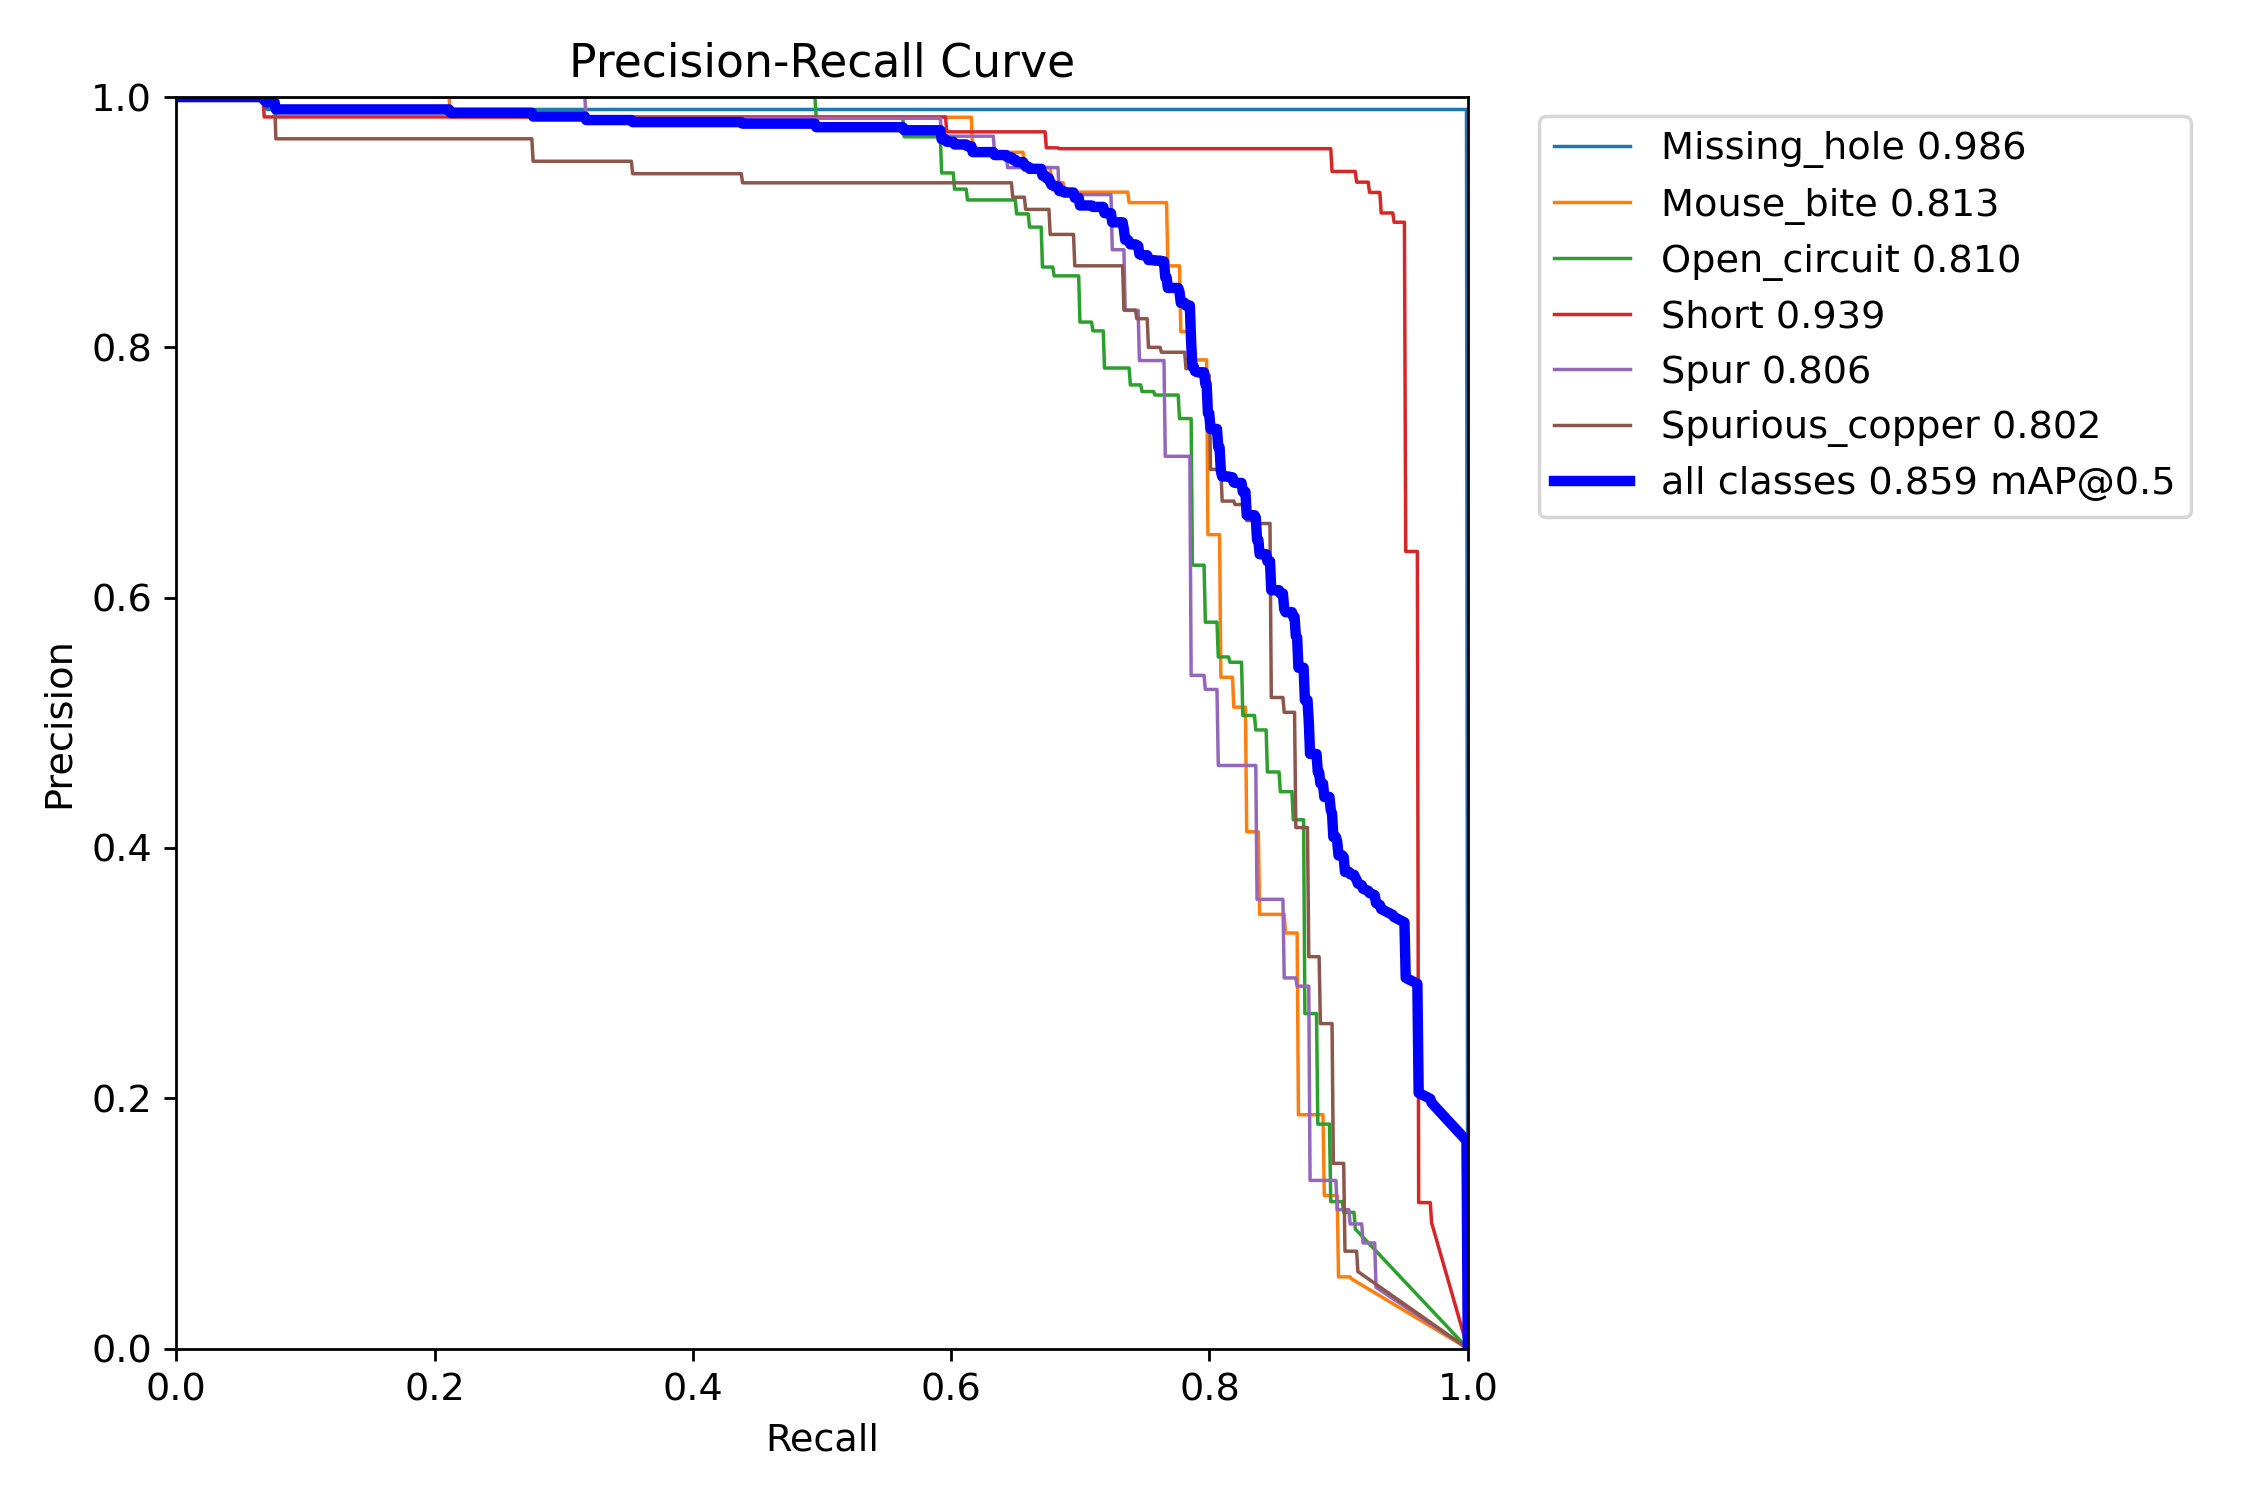


검증 결과 샘플:
Ground Truth:


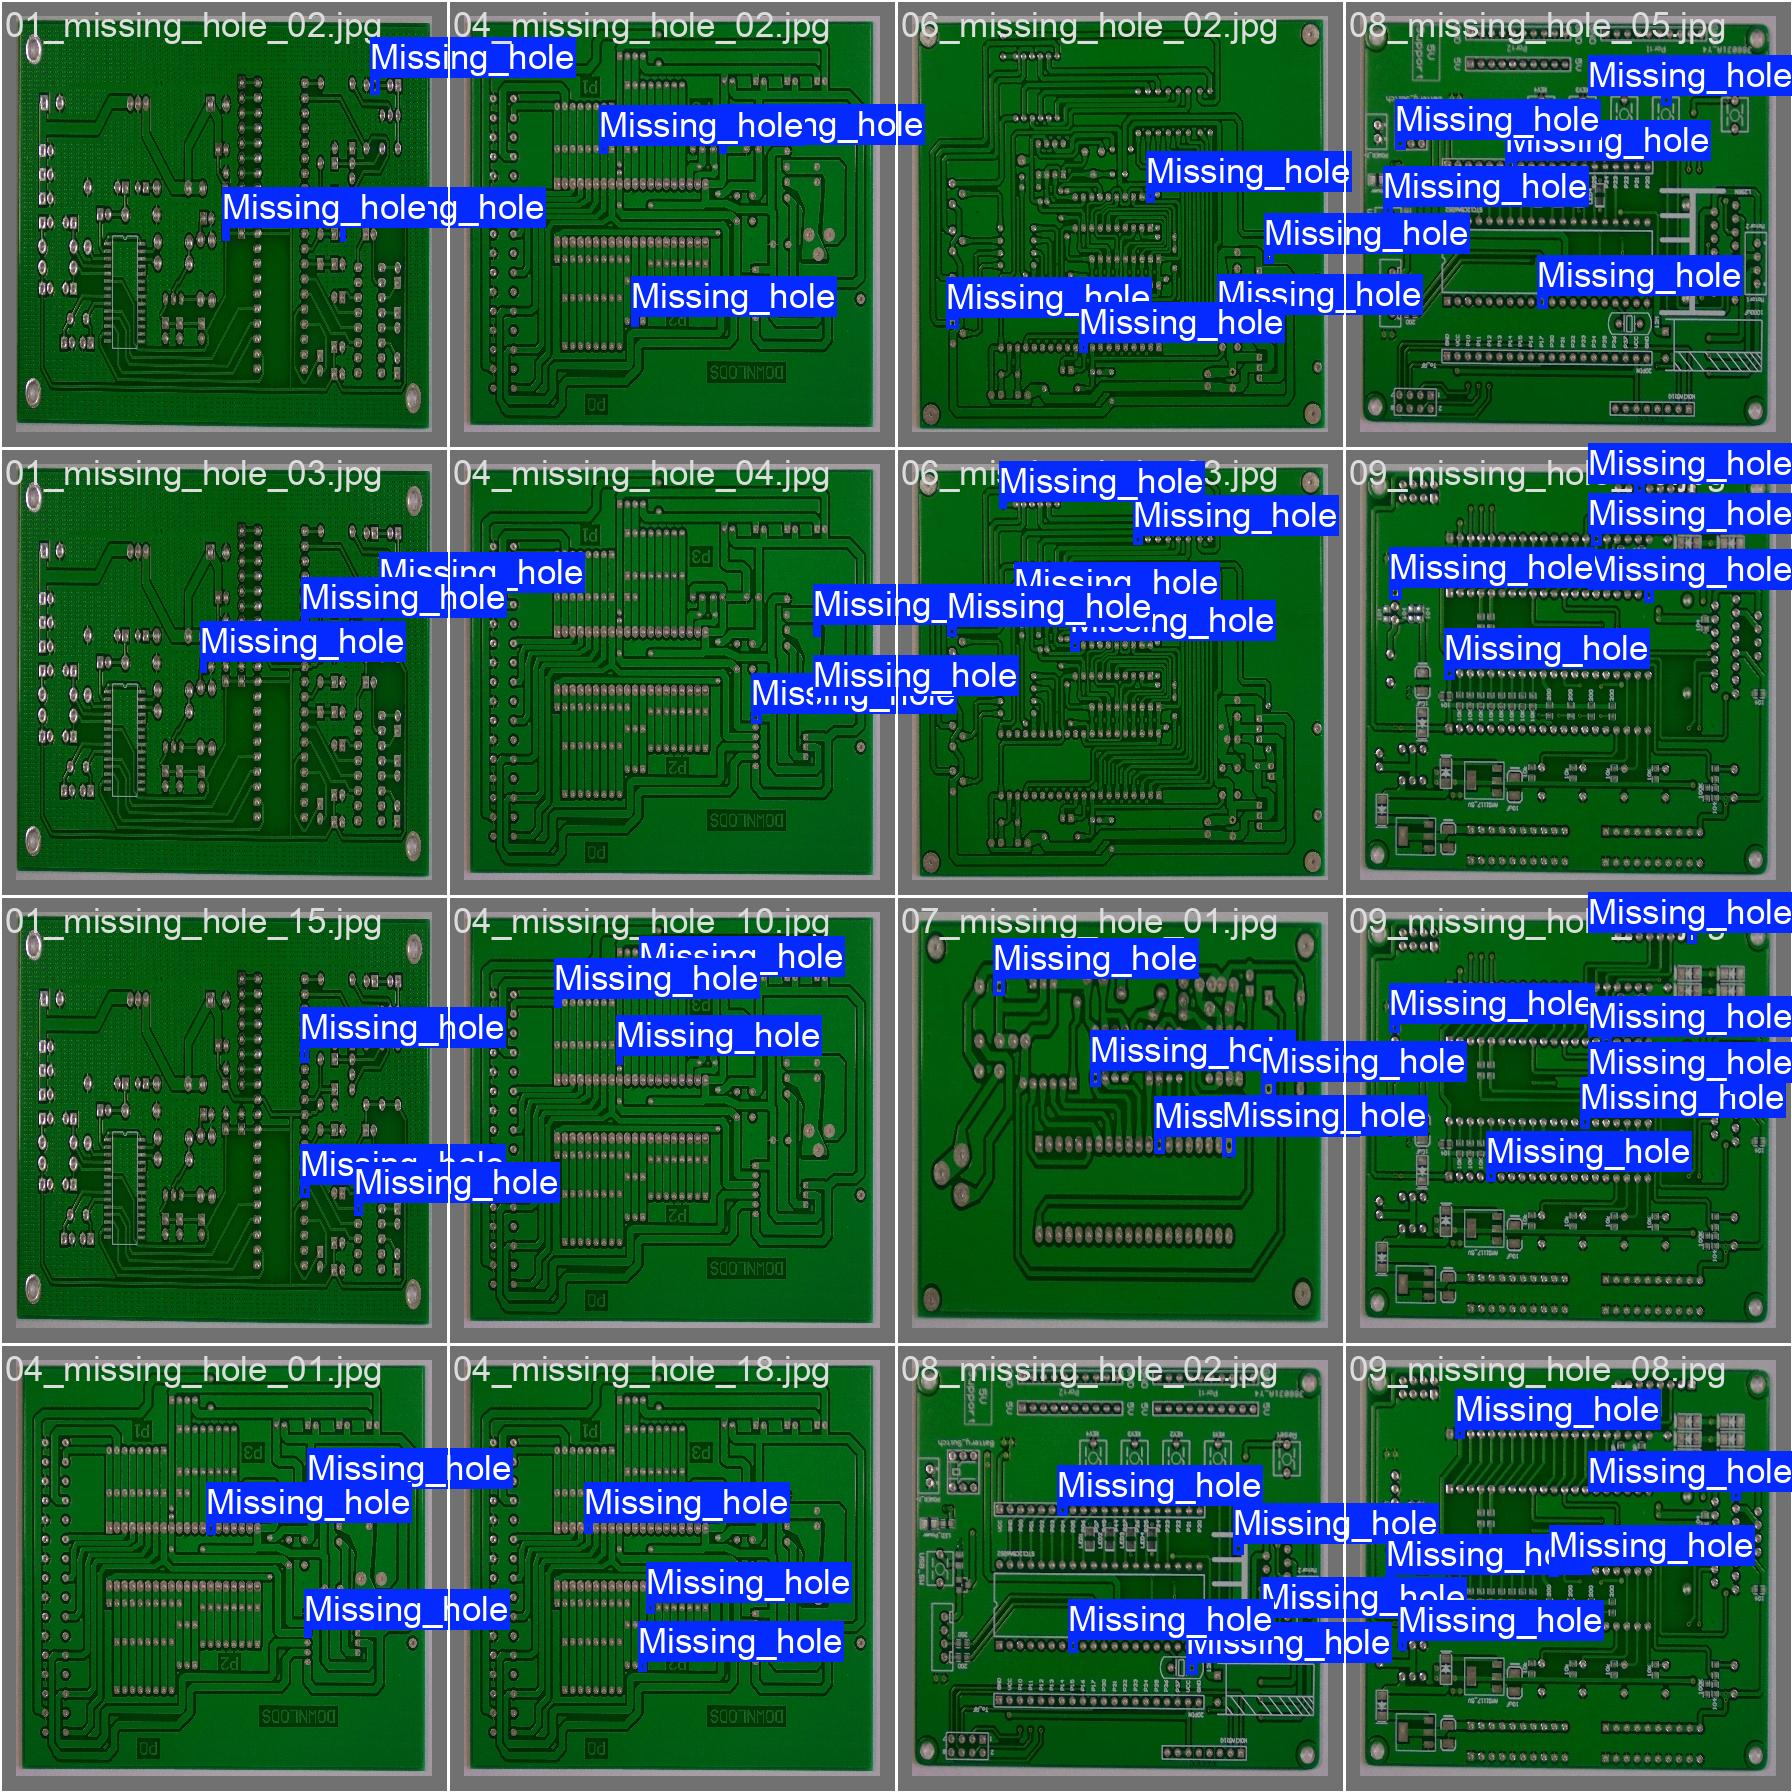


Prediction:


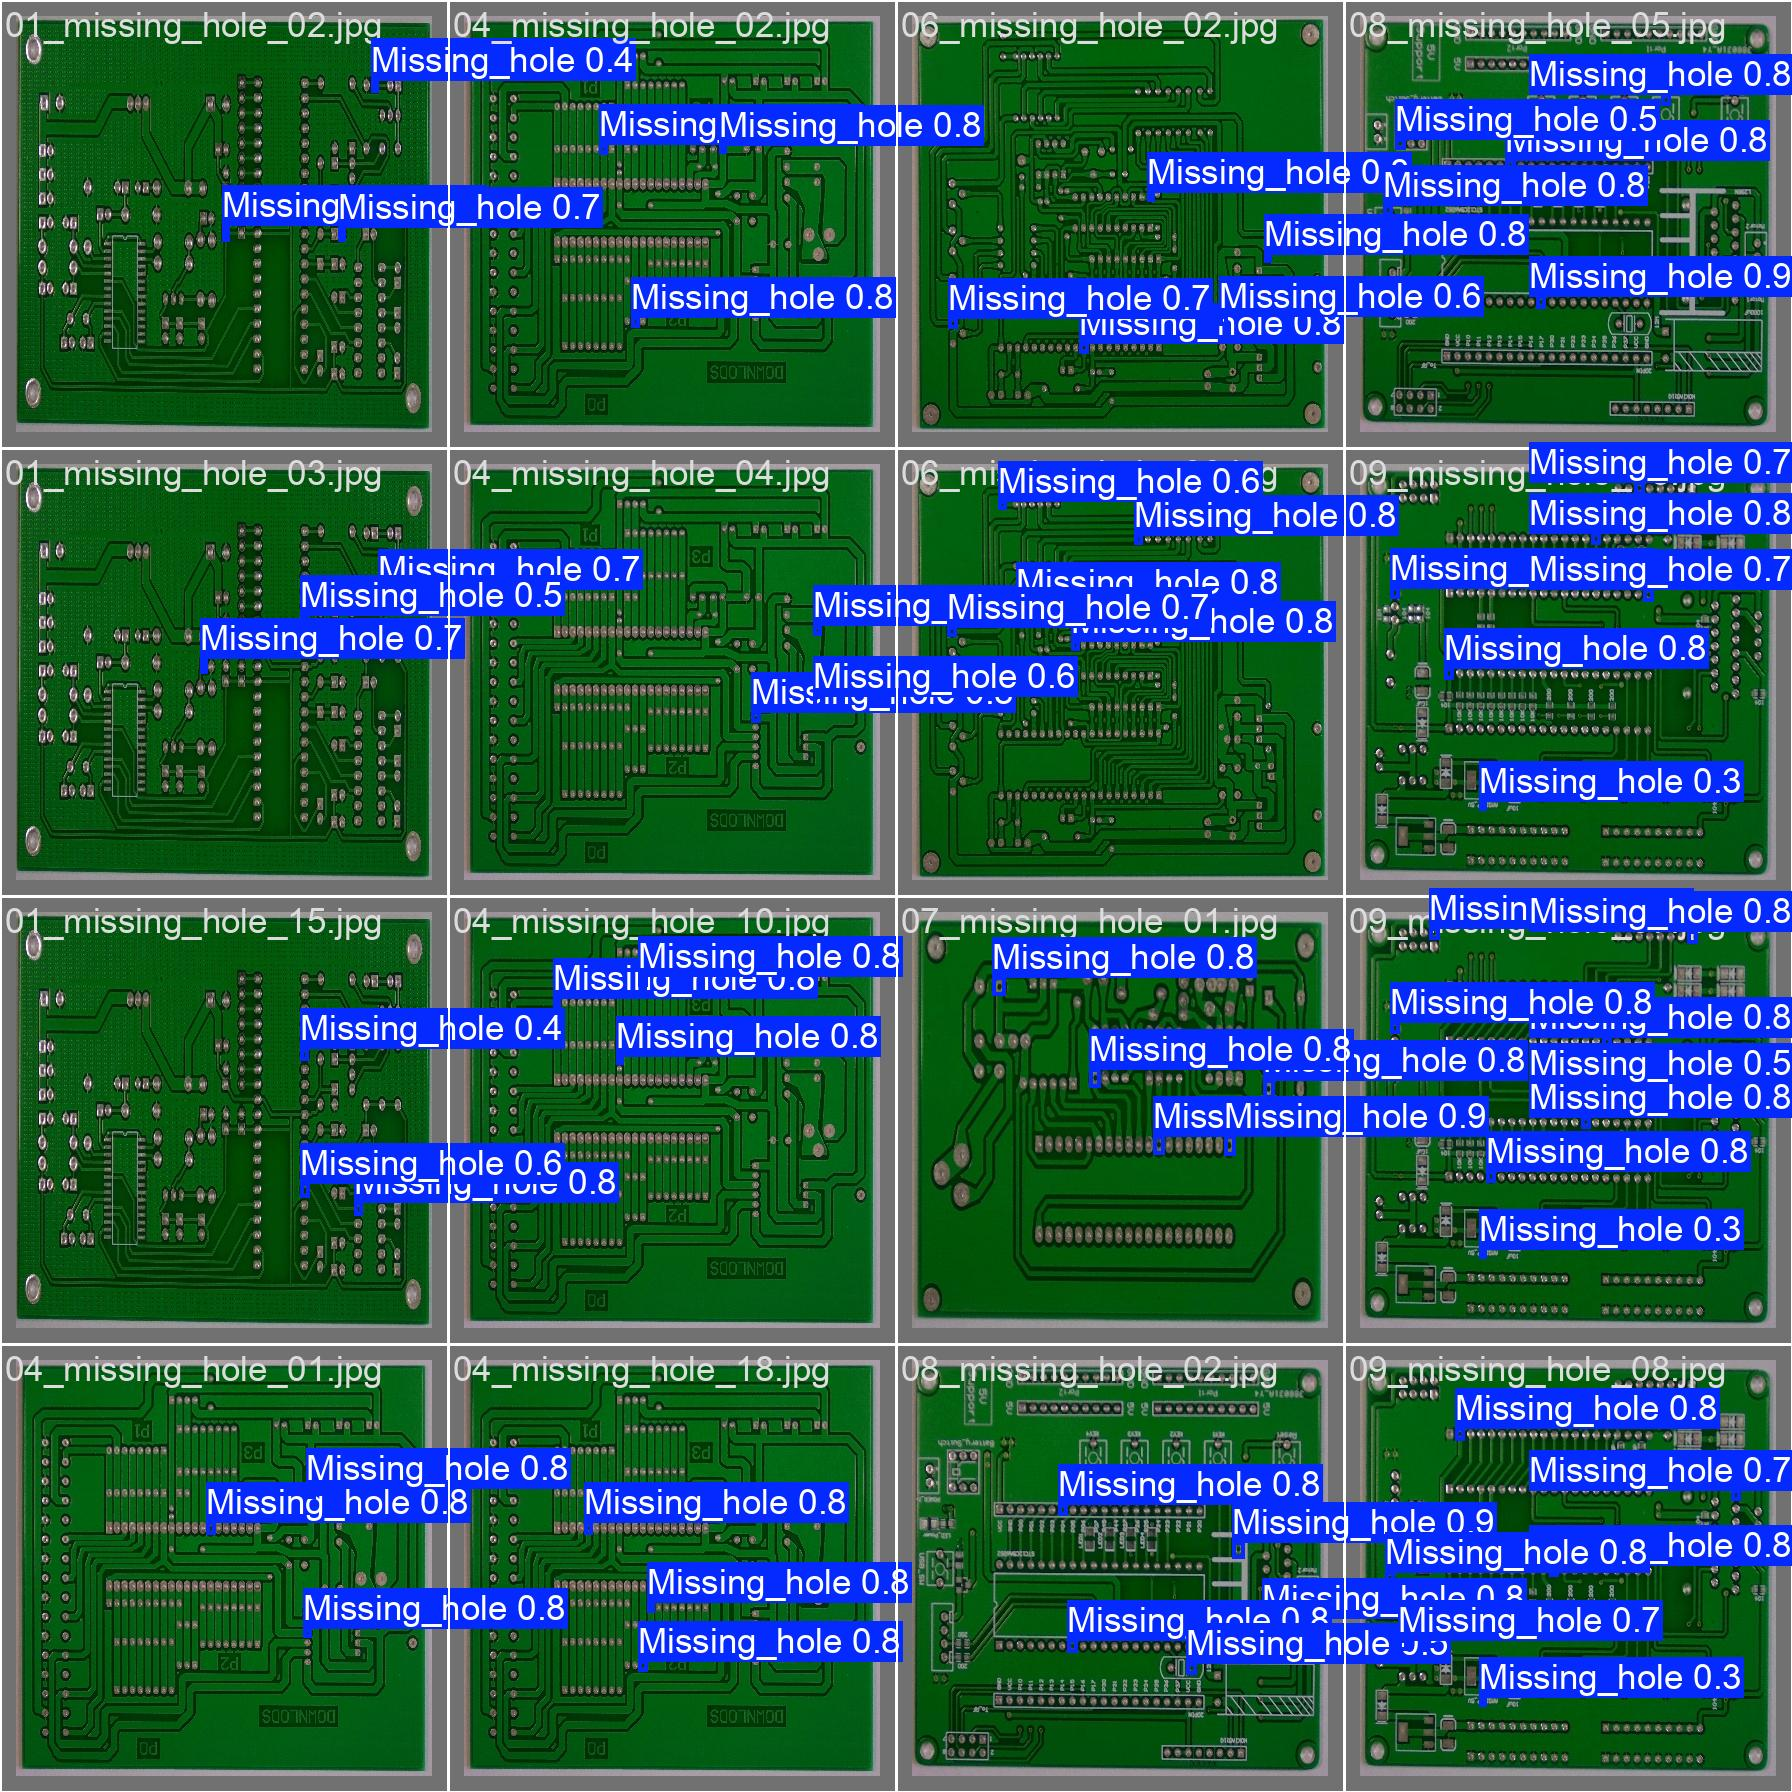

In [3]:
from IPython.display import Image

# 학습 곡선
print("\n학습 곡선:")
display(Image(os.path.join(RESULTS_PATH, 'results.png')))

print("\nConfusion Matrix:")
display(Image(os.path.join(RESULTS_PATH, 'confusion_matrix.png')))

print("\nPrecision-Recall 곡선:")
display(Image(os.path.join(RESULTS_PATH, 'BoxPR_curve.png')))

print("\n검증 결과 샘플:")
print("Ground Truth:")
display(Image(os.path.join(RESULTS_PATH, 'val_batch0_labels.jpg')))
print("\nPrediction:")
display(Image(os.path.join(RESULTS_PATH, 'val_batch0_pred.jpg')))

## 5. 결론

### 주요 성과
1. **높은 정확도**: mAP50 85.9% 달성
2. **우수한 클래스**: Missing_hole(98.6%), Short(93.9%)
3. **빠른 학습**: 6분 소요
4. **경량 모델**: 22.5MB로 실시간 검사 가능

### 개선점
- **Recall 77.9%**: 일부 결함 미검출 가능성
- **Open_circuit 클래스**: Recall 59.2%로 낮음
- **해결 방안**: 더 큰 모델(YOLOv8m) 시도